# Level Set Tree with the two moons

## Constructing the level set tree

In [1]:
from sklearn.datasets import make_moons
import debacl as dcl

import matplotlib.pyplot as plt
plt.style.use('grayscale')
%matplotlib notebook

/home/brian/miniconda/envs/complete/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [2]:
X, label = make_moons(n_samples=200, noise=0.1, random_state=19)

In [3]:
tree = dcl.construct_tree(X, k=20, prune_threshold=10,
                          verbose=True)
print tree

+----+-------------+-----------+------------+----------+------+--------+----------+
| id | start_level | end_level | start_mass | end_mass | size | parent | children |
+----+-------------+-----------+------------+----------+------+--------+----------+
| 0  |    0.000    |   0.185   |   0.000    |  0.195   | 200  |  None  |  [1, 2]  |
| 1  |    0.185    |   0.411   |   0.195    |  1.000   |  82  |   0    |    []    |
| 2  |    0.185    |   0.366   |   0.195    |  0.945   |  79  |   0    |    []    |
+----+-------------+-----------+------------+----------+------+--------+----------+


<IPython.core.display.Javascript object>


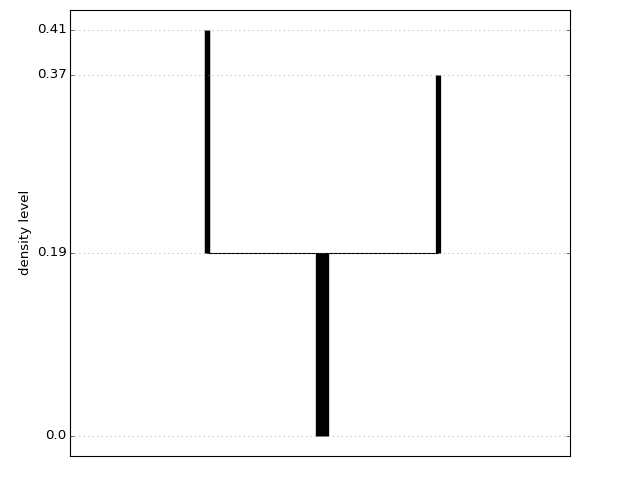

In [4]:
fig = tree.plot(form='density')[0]
fig.show()

## Retrieving the clusters

In [5]:
labels = tree.get_clusters(method='leaf', 
                           fill_background=False)
labels[:5]

array([[  0,   1],
       [129,   1],
       [  2,   1],
       [ 22,   1],
       [  7,   1]])

<IPython.core.display.Javascript object>


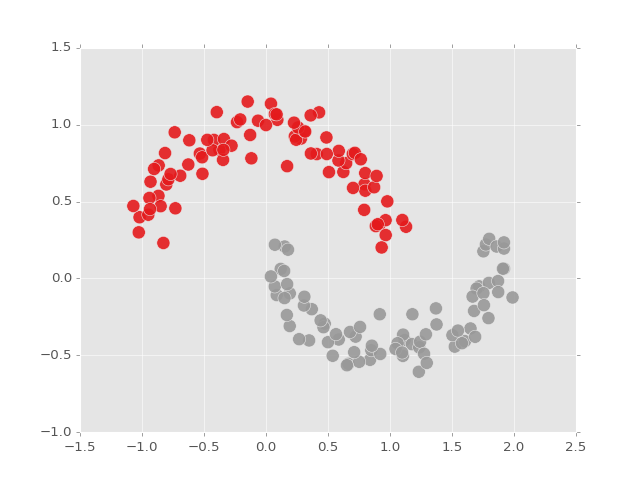

In [6]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots()
    
    ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1],
               c=labels[:,1], s=140, alpha=0.9,
               cmap=plt.cm.Set1)
    fig.show()

<IPython.core.display.Javascript object>


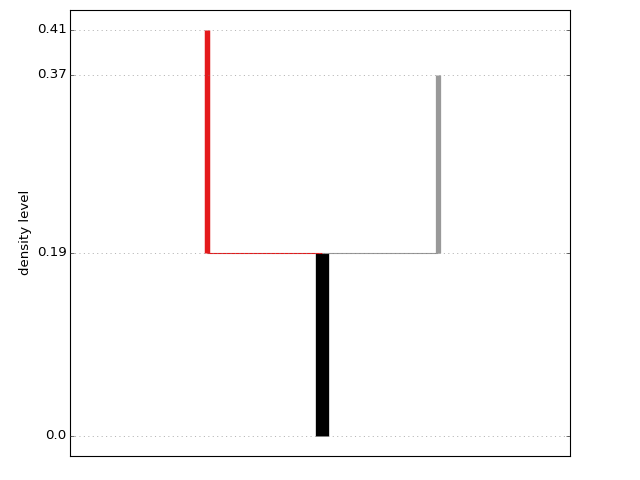

In [7]:
import numpy as np
leaf_nodes = np.unique(labels[:, 1])

plot = tree.plot(form='density', color_nodes=leaf_nodes,
                 colormap='Set1')
fig = plot[0]
fig.show()

## Identifying outliers

In [8]:
labels2 = tree.get_clusters(method='upper-level-set', threshold=0.05,
                            form='mass')

outliers = list(set(range(len(X))).difference(labels2[:, 0]))
outliers

[3, 132, 5, 135, 74, 27, 186, 99, 100, 58]

<IPython.core.display.Javascript object>


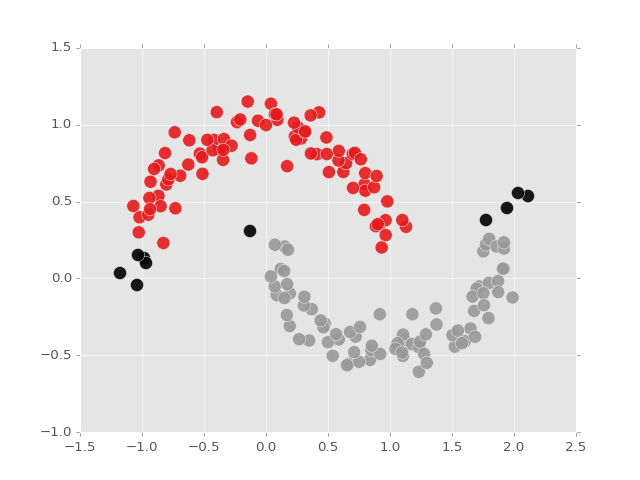

In [9]:
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots()
    
    ax.scatter(X[labels[:,0], 0], X[labels[:,0], 1], 
               c=labels[:,1], s=140, alpha=0.9,
               cmap=plt.cm.Set1)
    
    ax.scatter(X[outliers, 0], X[outliers, 1], c='black', s=140,
               alpha=0.9)
    fig.show()